In [1]:
import nltk
import re
print(nltk.corpus.gutenberg.fileids())
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
from nltk import sent_tokenize, word_tokenize, pos_tag
sents = sent_tokenize(text)
tokens = word_tokenize(text)
vocab = sorted(set(tokens))

[u'austen-emma.txt', u'austen-persuasion.txt', u'austen-sense.txt', u'bible-kjv.txt', u'blake-poems.txt', u'bryant-stories.txt', u'burgess-busterbrown.txt', u'carroll-alice.txt', u'chesterton-ball.txt', u'chesterton-brown.txt', u'chesterton-thursday.txt', u'edgeworth-parents.txt', u'melville-moby_dick.txt', u'milton-paradise.txt', u'shakespeare-caesar.txt', u'shakespeare-hamlet.txt', u'shakespeare-macbeth.txt', u'whitman-leaves.txt']


In [2]:
print("Number of sentences: " + str(len(sents)))
print("Number of tokens: " + str(len(tokens)))
print("Vocab size: " + str(len(vocab)))

Number of sentences: 7493
Number of tokens: 191673
Vocab size: 8467


In [3]:
from nltk.util import ngrams

unigrams = ngrams(tokens,1)
fdist_uni = nltk.FreqDist(unigrams)

#bigrams
bigrams = ngrams(tokens,2)
fdist_bi = nltk.FreqDist(bigrams)

#trigrams
trigrams=ngrams(tokens,3)
fdist_tri = nltk.FreqDist(trigrams)

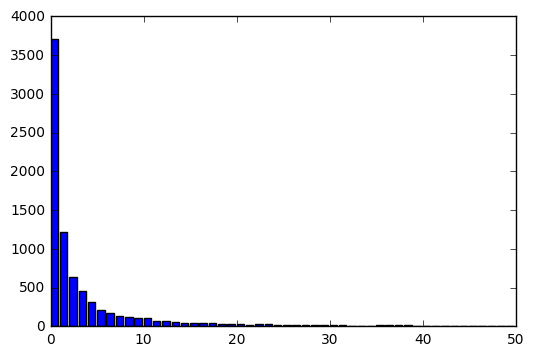

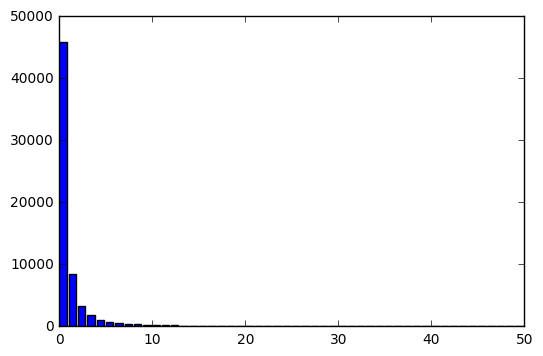

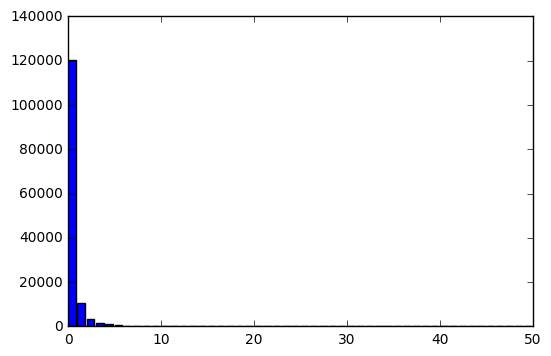

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_hist(fdict):
    values = [] #in same order as traversing keys
    keys = [] #also needed to preserve order
    for key in fdict.keys():
        keys.append(key)
        values.append(fdict[key])
    data = Counter(values)
    plt.xlim([0,50])
    plt.bar(range(len(data)), data.values())
    plt.show()

plot_hist(fdist_uni)
plot_hist(fdist_bi)
plot_hist(fdist_tri)

In [5]:
def get_coverage(fdict, percentage):
    values = [] #in same order as traversing keys
    keys = [] #also needed to preserve order
    for key in fdict.keys():
        keys.append(key)
        values.append(fdict[key])
    values.sort(reverse=True)
    print("Number of unique values: " + str(fdict.N()))
    total = sum(values)
    count = 0
    i = 0
    while(count<percentage*total):
        count+= values[i]
        i+=1
    return i
    
print("(most frequent) words are required for 90% coverage of the selected corpus: " + str(get_coverage(fdist_uni,0.9))) 
print("(most frequent) bigrams are required for 80% coverage of the selected corpus: " + str(get_coverage(fdist_bi,0.8))) 
print("(most frequent) trigrams are required for 70% coverage of the selected corpus: " + str(get_coverage(fdist_tri,0.7))) 

Number of unique values: 191673
(most frequent) words are required for 90% coverage of the selected corpus: 1204
Number of unique values: 191672
(most frequent) bigrams are required for 80% coverage of the selected corpus: 26982
Number of unique values: 191671
(most frequent) trigrams are required for 70% coverage of the selected corpus: 81294


In [42]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
# text_lemma = " ".join([wordnet_lemmatizer.lemmatize(i) for i in tokens])
tokens_lemma = [wordnet_lemmatizer.lemmatize(i) for i in tokens]

In [43]:
#After lemmatization
fdist_uni_lemma = nltk.FreqDist(tokens_lemma)

#bigrams
bigrams = ngrams(tokens_lemma,2)
fdist_bi_lemma = nltk.FreqDist(bigrams)

#trigrams
trigrams=ngrams(tokens_lemma,3)
fdist_tri_lemma = nltk.FreqDist(trigrams)

In [44]:
def get_coverage(fdict, percentage):
    values = [] #in same order as traversing keys
    keys = [] #also needed to preserve order
    for key in fdict.keys():
        keys.append(key)
        values.append(fdict[key])
    values.sort(reverse=True)
    print("Number of unique values: " + str(fdict.N()))
    total = sum(values)
    count = 0
    i = 0
    while(count<percentage*total):
        count+= values[i]
        i+=1
    return i
    
print("(most frequent) words are required for 90% coverage of the selected corpus: " + str(get_coverage(fdist_uni_lemma,0.9))) 
print("(most frequent) bigrams are required for 80% coverage of the selected corpus: " + str(get_coverage(fdist_bi_lemma,0.8))) 
print("(most frequent) trigrams are required for 70% coverage of the selected corpus: " + str(get_coverage(fdist_tri_lemma,0.7))) 

Number of unique values: 191673
(most frequent) words are required for 90% coverage of the selected corpus: 1081
Number of unique values: 191672
(most frequent) bigrams are required for 80% coverage of the selected corpus: 25401
Number of unique values: 191671
(most frequent) trigrams are required for 70% coverage of the selected corpus: 80592


In [45]:
import re

#Ending on !,? relatively unambiguous
#Periods are ambiguous due to usage in abbreviations, numbers

def splitParagraphIntoSentences(paragraph):
    ''' break a paragraph into sentences
        and return a list '''
    sentenceEnders = re.compile('[.!?]')
    sentenceList = sentenceEnders.split(paragraph)
    return sentenceList

# sentences_1 = re.split(r' *[\.\?!][\'"\)\]]* *', text)
sentences_2 = splitParagraphIntoSentences(text)
sentences_3 = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)',text)

In [46]:
#Part 3
import re

word_re = re.compile(r"""
    (?:[a-z][a-z'\-_]+[a-z])       # Words with apostrophes or dashes.
    |
    (?:[+\-]?\d+[,/.:-]\d+[+\-]?)  # Numbers, including fractions, decimals.
    |
    (?:[\w_]+)                     # Words without apostrophes or dashes.
    |
    (?:\.(?:\s*\.){1,})            # Ellipsis dots. 
    |
    (?:\S)                         # Everything else that isn't whitespace.
    """, re.VERBOSE | re.I | re.UNICODE)

class Tokenizer:
    def __init__(self, preserve_case=False):
        self.preserve_case = preserve_case

    def tokenize(self, s):
        """
        Argument: s -- any string or unicode object
        Value: a tokenize list of strings; conatenating this list returns the original string if preserve_case=False
        """        
        # Try to ensure unicode:
        try:
            s = unicode(s)
        except UnicodeDecodeError:
            s = str(s).encode('string_escape')
            s = unicode(s)
        # Tokenize:
        words = word_re.findall(s)
        return words
    
tok = Tokenizer(preserve_case=False)
word_tokens = []
for s in sents:
    tokenized = tok.tokenize(s)
    word_tokens+=tokenized 

In [47]:
def get_coverage(fdict, percentage):
    values = [] #in same order as traversing keys
    keys = [] #also needed to preserve order
    for key in fdict.keys():
        keys.append(key)
        values.append(fdict[key])
    values.sort(reverse=True)
    print("Number of unique values: " + str(fdict.N()))
    total = sum(values)
    count = 0
    i = 0
    while(count<percentage*total):
        count+= values[i]
        i+=1
    return i


#Repeat secton 2 after creating tokens
fdict_uni = nltk.FreqDist(word_tokens)
bigrams = ngrams(word_tokens,2)
fdist_bi = nltk.FreqDist(bigrams)
trigrams=ngrams(word_tokens,3)
fdist_tri = nltk.FreqDist(trigrams)
print("(most frequent) words are required for 90% coverage of the selected corpus: " + str(get_coverage(fdist_uni,0.9))) 
print("(most frequent) bigrams are required for 80% coverage of the selected corpus: " + str(get_coverage(fdist_bi,0.8))) 
print("(most frequent) trigrams are required for 70% coverage of the selected corpus: " + str(get_coverage(fdist_tri,0.7))) 


#With lemmatizations
wordnet_lemmatizer = WordNetLemmatizer()
tokens_lemma = [wordnet_lemmatizer.lemmatize(i) for i in word_tokens]

fdict_uni = nltk.FreqDist(tokens_lemma)
bigrams = ngrams(tokens_lemma,2)
fdist_bi = nltk.FreqDist(bigrams)
trigrams=ngrams(tokens_lemma,3)
fdist_tri = nltk.FreqDist(trigrams)
print("(most frequent) words are required for 90% coverage of the selected corpus: " + str(get_coverage(fdist_uni,0.9))) 
print("(most frequent) bigrams are required for 80% coverage of the selected corpus: " + str(get_coverage(fdist_bi,0.8))) 
print("(most frequent) trigrams are required for 70% coverage of the selected corpus: " + str(get_coverage(fdist_tri,0.7))) 

Number of unique values: 191673
(most frequent) words are required for 90% coverage of the selected corpus: 1204
Number of unique values: 193282
(most frequent) bigrams are required for 80% coverage of the selected corpus: 27004
Number of unique values: 193281
(most frequent) trigrams are required for 70% coverage of the selected corpus: 78700
Number of unique values: 191673
(most frequent) words are required for 90% coverage of the selected corpus: 1204
Number of unique values: 193282
(most frequent) bigrams are required for 80% coverage of the selected corpus: 25462
Number of unique values: 193281
(most frequent) trigrams are required for 70% coverage of the selected corpus: 77993


In [15]:
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.compat import iteritems

tokens = []
stopwords = nltk.corpus.stopwords.words('english')
data_tokens = nltk.wordpunct_tokenize(text)
filtered_tokens = [w for w in data_tokens if w.lower() not in stopwords]
tokens = tokens + filtered_tokens

print 'Total tokens loaded: %d' % (len(tokens))

def get_score(bigram, wfd, bfd, n_xx):
    n_ix = wfd[bigram[0]]
    n_xi = wfd[bigram[1]]
    n_ii = bfd[bigram]
    n_oi = n_xi - n_ii
    n_io = n_ix - n_ii
    n_oo = n_xx - n_ii - n_oi - n_io
    score = (float(n_ii*n_oo - n_io*n_oi)**2 /
                ((n_ii + n_io) * (n_ii + n_oi) * (n_io + n_oo) * (n_oi + n_oo)))
#     print bigram,score
#     *n_xx increase precision
    return score
    
print 'Calculating Collocations'

wfd = FreqDist()
bfd = FreqDist()
for window in ngrams(tokens, 2, pad_right=True):
    w1 = window[0]
    if w1 is None:
        continue
    wfd[w1] += 1
    for w2 in window[1:]:
        if w2 is not None:
            bfd[(w1, w2)] += 1
            
after_filter_bigrams = FreqDist()
for words, freq in iteritems(bfd):
    if not (freq < 3):
        after_filter_bigrams[words] = freq

score_FD = FreqDist()
for bigram in  after_filter_bigrams:
    score_FD[bigram] = get_score(bigram, wfd, after_filter_bigrams, after_filter_bigrams.N())

Total tokens loaded: 103976
Calculating Collocations


In [16]:
score_FD.most_common(100)

[((u'caro', u'sposo'), 1.0),
 ((u'Maple', u'Grove'), 1.0),
 ((u'South', u'End'), 1.0),
 ((u'monarch', u'seas'), 1.0),
 ((u'Brunswick', u'Square'), 1.0),
 ((u'&', u'c'), 1.0),
 ((u'Box', u'Hill'), 0.9473478032280641),
 ((u'William', u'Larkins'), 0.5907933625324929),
 ((u'husbands', u'wives'), 0.5624673655278514),
 ((u'Frank', u'Churchill'), 0.48960229673180267),
 ((u'eating', u'drinking'), 0.4570881542306032),
 ((u'Mill', u'Farm'), 0.45448611698992447),
 ((u'Friday', u'Saturday'), 0.4285341323022987),
 ((u'Colonel', u'Campbell'), 0.40410546246821855),
 ((u'sore', u'throat'), 0.3749020894832896),
 ((u'Robert', u'Martin'), 0.35285899638771184),
 ((u'frozen', u'maid'), 0.27267980474838016),
 ((u'baked', u'apples'), 0.2665448233842692),
 ((u',"', u'said'), 0.25019669575556874),
 ((u'."', u'"'), 0.23524497393280072),
 ((u'extensive', u'grounds'), 0.2249379947870826),
 ((u'nicely', u'dressed'), 0.2249330999359156),
 ((u'Vicarage', u'Lane'), 0.2221351957015491),
 ((u'Oh', u'!'), 0.221501041228

In [2]:
#Part 4
from sklearn.model_selection import train_test_split
train, test = train_test_split(sents, test_size = 0.1, random_state=42)

In [6]:
#interpolation
import math
from random import randint

class LangModel:
    
    def __init__(self, train):
        self._uni = nltk.FreqDist()
        self._bi = nltk.FreqDist()
        self._tri = nltk.FreqDist()
        for sent in train:
            words = nltk.word_tokenize(sent)
            word_trigrams = nltk.ngrams(words, 3)
            word_bigrams = nltk.ngrams(words, 2)
            word_unigrams = nltk.ngrams(words, 1)
            for wordNGram in word_trigrams:
                self._tri[wordNGram] += 1
            for wordNGram in word_bigrams:
                self._bi[wordNGram] += 1
            for wordNGram in word_unigrams:
                self._uni[wordNGram] += 1
        
    def logprob(self, ngram, t1, t2, t3):
        prob = self.prob(ngram, t1, t2, t3)
        return math.log(prob,2)

    def prob(self, ngram, t1, t2, t3):
        
        if self._tri[ngram] != 0:
            return t1 * float(self._tri[ngram])/(self._bi[ngram[:-1]]) + t2 * float(self._bi[ngram[:-1]])/(self._uni[ngram[:-2]]) + t3 * float(self._uni[ngram[:-2]])/(self._uni.N())
        elif self._bi[ngram] != 0:
            return t2 * float(self._bi[ngram[:-1]])/(self._uni[ngram[:-2]]) + t3 * float(self._uni[ngram[:-2]])/(self._uni.N())
        elif self._uni[ngram] != 0:
            return t3 * float(self._uni[ngram[:-2]])/ (len(vocab))
        else:
            return float(1) / len(vocab)
        
        
    def validation_test(self,valid,n_iter=10):
        _l1 = 0.0
        _l2 = 0.0
        _l3 = 0.0
        likelihood = float("inf")
        perplexity = float("inf")
        curr_likelihood = 0.0
        curr_perplexity = 0.0 
        for i in range(0,n_iter):
            rand1 = randint(1,9)
            rand2 = randint(1,9)
            rand3 = randint(1,9)
            t1   = float(rand1)/(rand1 + rand2 + rand3)
            t2   = float(rand2)/(rand1 + rand2 + rand3)
            t3   = float(rand3)/(rand1 + rand2 + rand3)
            
            count = 0
            sum_log_prob = 0.0
            for sent in valid:
                words = nltk.word_tokenize(sent)
                word_trigrams = nltk.ngrams(words, 3)
                for trigram in word_trigrams:
                    log_prob = lm.logprob(trigram,t1,t2,t3)
                    sum_log_prob += log_prob
                    count+=1
            
            curr_likelihood = float(sum_log_prob)/count
            curr_perplexity = 2.0**(-curr_likelihood)
            if(curr_perplexity<perplexity):
                perplexity = curr_perplexity
                likelihood = curr_likelihood
#                 print perplexity, likelihood
                _l1 = t1
                _l2 = t2
                _l3 = t3
            
        return perplexity, likelihood, _l1, _l2, _l3
    
for i in range(5):
    train, valid = train_test_split(train, test_size = 0.1, random_state=42)
    lm = LangModel(train)
    perplexity,likelihood, l1,l2,l3 = lm.validation_test(valid,10)
    print("Perplexity(Valid): " + str(perplexity))
    print("Likelihood(Valid): " + str(likelihood))
    print("Lambdas: (l1,l2,l3): " + str(l1) +" " +  str(l2) + " " + str(l3)) 
    
    print("Independent test set...")
    for sent in test:
        words = nltk.word_tokenize(sent)
        word_trigrams = nltk.ngrams(words, 3)
        sum_log_prob = 0.0
        count = 0
        for trigram in word_trigrams:
            log_prob = lm.logprob(trigram, l1,l2,l3)
            sum_log_prob += log_prob
            count+=1
    likelihood = float(sum_log_prob)/count
    perplexity = 2.0**(-likelihood)
    print("Perplexity(test): " + str(perplexity))
    print("Likelihood(test): " + str(likelihood))

Perplexity(Valid): 905.266050757
Likelihood(Valid): -9.82219804131
Lambdas: (l1,l2,l3): 0.666666666667 0.0833333333333 0.25
Independent test set...
Perplexity(test): 1700.79959349
Likelihood(test): -10.7319974418
Perplexity(Valid): 1011.82551398
Likelihood(Valid): -9.98274480808
Lambdas: (l1,l2,l3): 0.466666666667 0.4 0.133333333333
Independent test set...
Perplexity(test): 1554.23800723
Likelihood(test): -10.6019917315
Perplexity(Valid): 943.971409248
Likelihood(Valid): -9.88259935406
Lambdas: (l1,l2,l3): 0.75 0.166666666667 0.0833333333333
Independent test set...
Perplexity(test): 1453.70030682
Likelihood(test): -10.5055141602
Perplexity(Valid): 1078.9916391
Likelihood(Valid): -10.0754679704
Lambdas: (l1,l2,l3): 0.625 0.25 0.125
Independent test set...
Perplexity(test): 1495.30073463
Likelihood(test): -10.5462199529
Perplexity(Valid): 1120.38391305
Likelihood(Valid): -10.1297774585
Lambdas: (l1,l2,l3): 0.615384615385 0.230769230769 0.153846153846
Independent test set...
Perplexity(te

In [50]:
import math
from nltk.probability import (FreqDist,
    ConditionalProbDist,
    ConditionalFreqDist,
    LidstoneProbDist, ELEProbDist, SimpleGoodTuringProbDist)
from nltk.compat import iteritems

class LangModel:
    
    def __init__(self, order, sentences):
        self.order = order
        self.ngramFD = FreqDist()
        lexicon = set()
        self.cfd = ConditionalFreqDist()
        for sentence in sentences:
            sentence = re.sub(r'[^\w\s]','',sentence)
            words = nltk.word_tokenize(sentence)
            wordNGrams = nltk.ngrams(words, order)
            for wordNGram in wordNGrams:
                self.ngramFD[wordNGram] += 1
                context = tuple(wordNGram[:-1])
                token = wordNGram[-1]
                self.cfd[context][token] += 1
                
        if order > 1:
            self.backoff = LangModel(order - 1, sentences)
            self.backoff_alphas = dict()
            for ctxt in self.cfd.conditions():
                total_observed_pr = 0.0
                for word in self.cfd[ctxt].iterkeys():
                    total_observed_pr += float(self.prob(word,ctxt))
                self.backoff_alphas[ctxt] = 1.0 - total_observed_pr
        else:
            self.backoff = None
            self.backoff_alphas = None
                
    def prob(self, word, context):
        context = tuple(context)
        if (context + (word,) in self.ngramFD or self.order==1):
            if(self.order!=1):
                return (self.ngramFD[(context + (word,))] - 0.5)/self.backoff.ngramFD[context]
            else:
                return (self.ngramFD[(context + (word,))] + 0.5)/(len(vocab))
        else:
            return self.alpha(context) * self.backoff.prob(word, context[1:])   
        
    def alpha(self, context):
#         print context
        if context in self.backoff_alphas:
            if self.backoff_alphas[context] != 0.0:
                return self.backoff_alphas[context]
        else:
            return 1.0
                     
    
lm1 = LangModel(3, train)

In [51]:
import math
for sent in test:
    sent = re.sub(r'[^\w\s]','',sent)
    words = nltk.word_tokenize(sent)
    word_trigrams = nltk.ngrams(words, 3)
    sum_log_prob = 0.0
    count = 1
    for trigram in word_trigrams:
        context = tuple(trigram[:-1])
        token = trigram[-1]
#         print context,token
        log_prob = lm1.prob(token,context)
#         print log_prob
        sum_log_prob += math.log(log_prob)
        count+=1
likelihood = float(sum_log_prob)/count
perplexity = 2.0**(-likelihood)
print("Perplexity(test): " + str(perplexity))
print("Likelihood(test): " + str(likelihood))

Perplexity(test): 14.5713500739
Likelihood(test): -3.86506264797


In [59]:
#fixed alpha
class LangModel:
    def __init__(self, order, alpha, sentences):
        self.order = order
        self.alpha = alpha
        if order > 1:
            self.backoff = LangModel(order - 1, alpha, sentences)
            self.lexicon = None
        else:
            self.backoff = None
            self.n = 0
        self.ngramFD = nltk.FreqDist()
        lexicon = set()
        for sentence in sentences:
            words = nltk.word_tokenize(sentence)
            wordNGrams = nltk.ngrams(words, order)
            for wordNGram in wordNGrams:
                self.ngramFD[wordNGram]+=1
            if order == 1:
                lexicon.add(wordNGram)
                self.n += 1
        self.v = len(lexicon)

    def logprob(self, ngram):
        return math.log(self.prob(ngram))
  
    def prob(self, ngram):
        if self.backoff != None:
        freq = self.ngramFD[ngram]
        backoffFreq = self.backoff.ngramFD[ngram[1:]]
        if freq == 0:
            return self.alpha * self.backoff.prob(ngram[1:])
        else:
            return (float(freq) - 0.5) / backoffFreq
        else:
            return (float(self.ngramFD[ngram] + 1) / (self.n + self.v))
lm = LangModel(3, 0.5, train)

In [60]:
import math
for sent in test:
    words = nltk.word_tokenize(sent)
    word_trigrams = nltk.ngrams(words, 3)
    sum_log_prob = 0.0
    count = 1
    for trigram in word_trigrams:
#         context = tuple(trigram[:-1])
#         token = trigram[-1]
        log_prob = lm.logprob(trigram)
#         print log_prob
        sum_log_prob += log_prob
        count+=1
likelihood = float(sum_log_prob)/count
perplexity = 2.0**(-likelihood)
print("Perplexity(test): " + str(perplexity))
print("Likelihood(test): " + str(likelihood))

Perplexity(test): 77.0558892931
Likelihood(test): -6.26783331937
